In [1]:
import numpy as np
from fancyimpute import IterativeSVD
# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.00888731 0.00867327 0.02267507 ... 0.09303638 0.10884881 0.00944091]
 [0.0308411  0.03009831 0.0786879  ... 0.32285845 0.37773134 0.03276222]
 [0.00671262 0.00655095 0.01712656 ... 0.07027069 0.08221387 0.00713075]
 ...
 [0.02219869 0.02166405 0.05663769 ... 0.23238587 0.27188209 0.02358147]
 [0.01322717 0.01290861 0.03374778 ... 0.138468   0.16200197 0.01405111]
 [0.01740661 0.01698739 0.04441119 ... 0.18222025 0.21319033 0.01849089]]

Noisy Matrix (with Homoscedastic Noise):
[[-0.05491781 -0.07762495 -0.07769133 ...  0.00455572  0.1444869
   0.00129806]
 [-0.02306151 -0.10148169  0.06562448 ...  0.4097316   0.42117886
  -0.00383684]
 [-0.06268543  0.12864974  0.02337935 ...  0.08286395  0.17735862
  -0.02049992]
 ...
 [ 0.06644496  0.07579495  0.09642656 ...  0.21585772  0.25921634
   0.19383449]
 [ 0.04233853 -0.03953695  0.04784975 ...  0.19036997  0.12343004
  -0.09072433]
 [-0.03545689  0.06552691  0.10243585 ... -0.03771638  0.45866429
  -0.098

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:

noisy_matrix[1,1]=np.nan
imputed_data = IterativeSVD().fit_transform(noisy_matrix)
 

U, s, Vt = np.linalg.svd(imputed_data , full_matrices=False)
 

mycebmf= cEBMF(data= noisy_matrix)
K=5

[IterativeSVD] Iter 1: observed MAE=0.079456
[IterativeSVD] Iter 2: observed MAE=0.076253
[IterativeSVD] Iter 3: observed MAE=0.070373
[IterativeSVD] Iter 4: observed MAE=0.059356
[IterativeSVD] Iter 5: observed MAE=0.054355
[IterativeSVD] Iter 6: observed MAE=0.054350
[IterativeSVD] Iter 7: observed MAE=0.054349
[IterativeSVD] Iter 8: observed MAE=0.054348
[IterativeSVD] Iter 9: observed MAE=0.054348
[IterativeSVD] Iter 10: observed MAE=0.054347
[IterativeSVD] Iter 11: observed MAE=0.054347
[IterativeSVD] Iter 12: observed MAE=0.054347


In [4]:
K = np.min([K, U.shape[1]])
print(K)

5


In [5]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])
print(mycebmf.K)

The array contains missing values (NaN), generate initialization using iterive svd.
[IterativeSVD] Iter 1: observed MAE=0.079456
[IterativeSVD] Iter 2: observed MAE=0.076253
[IterativeSVD] Iter 3: observed MAE=0.070373
[IterativeSVD] Iter 4: observed MAE=0.059356
[IterativeSVD] Iter 5: observed MAE=0.054355
[IterativeSVD] Iter 6: observed MAE=0.054350
[IterativeSVD] Iter 7: observed MAE=0.054349
[IterativeSVD] Iter 8: observed MAE=0.054348
[IterativeSVD] Iter 9: observed MAE=0.054348
[IterativeSVD] Iter 10: observed MAE=0.054347
[IterativeSVD] Iter 11: observed MAE=0.054347
[IterativeSVD] Iter 12: observed MAE=0.054347
[-0.08839306 -0.23554811  0.22877114  0.20046757 -0.00123259  0.22342966
 -0.35689949  0.01534145  0.07797209  0.28740512  0.18976503  0.23869736
  0.07999731 -0.13861803  0.0906878   0.02931748 -0.07513135 -0.20398751
  0.07733635 -0.24362215  0.02768375  0.05457851  0.22597422 -0.1368175
  0.10499464 -0.03133811 -0.06915586 -0.27714     0.04852113 -0.27415838
 -0.00581

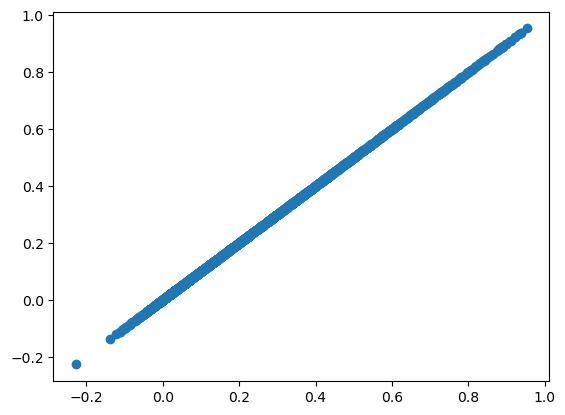

In [6]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

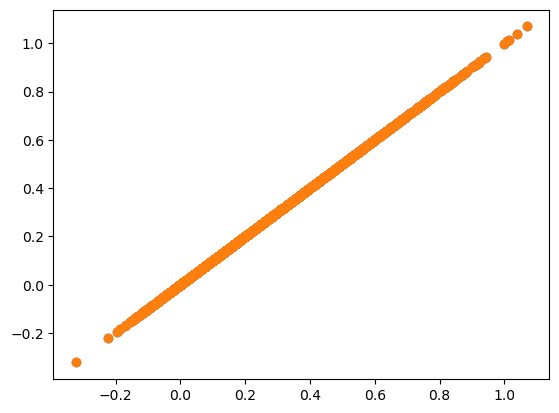

In [7]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [8]:
mycebmf.update_tau()
1/mycebmf.tau

array([[0.00722412, 0.00722412, 0.00722412, ..., 0.00722412, 0.00722412,
        0.00722412],
       [0.00722412, 0.00722412, 0.00722412, ..., 0.00722412, 0.00722412,
        0.00722412],
       [0.00722412, 0.00722412, 0.00722412, ..., 0.00722412, 0.00722412,
        0.00722412],
       ...,
       [0.00722412, 0.00722412, 0.00722412, ..., 0.00722412, 0.00722412,
        0.00722412],
       [0.00722412, 0.00722412, 0.00722412, ..., 0.00722412, 0.00722412,
        0.00722412],
       [0.00722412, 0.00722412, 0.00722412, ..., 0.00722412, 0.00722412,
        0.00722412]])

In [9]:
 
mycebmf.update_loading_factor_k(k=0)

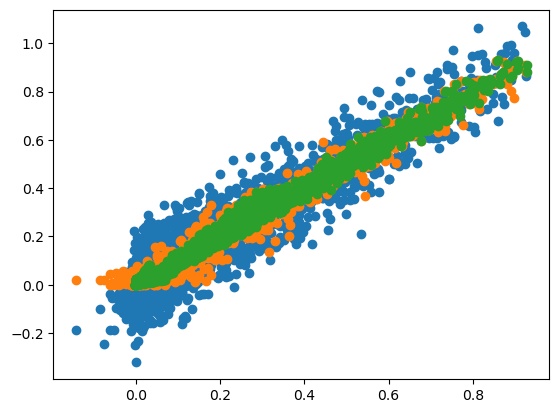

In [10]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

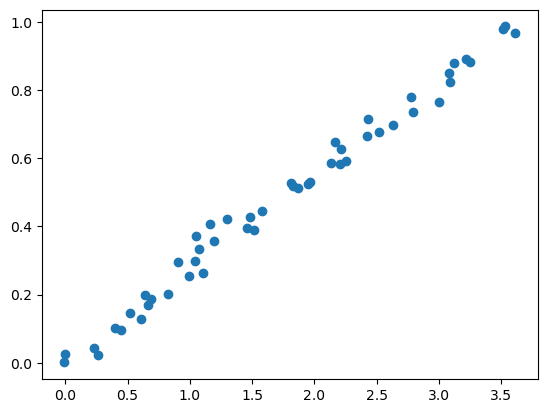

In [11]:
plt.scatter(mycebmf.L[:,0], u)

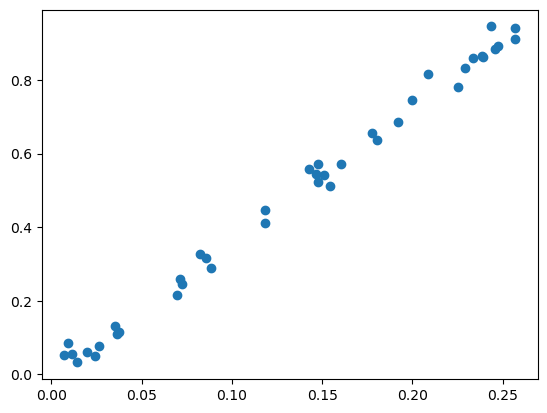

In [12]:
plt.scatter(mycebmf.F[:,0], v)

In [13]:
np.zeros_like(range(10))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
mycebmf.kl_l

array([-165,  -36,  -33,  -29,  -25])

In [15]:
k=1

mycebmf.cal_partial_residuals(k=k)
lhat , s_l  = compute_hat_l_and_s_l(Z =mycebmf.Rk,
                                                            nu =mycebmf.F[:,k] ,
                                                            omega=mycebmf.F2[:,k], 
                                                            tau=mycebmf.tau,
                                                            has_nan=mycebmf.has_nan)
     
ash_obj = ash(betahat   =lhat,
                      sebetahat =s_l ,
                      prior     =mycebmf.prior_L,
                      verbose=False
                      )
mycebmf.L  [:,k] =ash_obj.post_mean
mycebmf.L2 [:,k] =ash_obj.post_mean2
        
mycebmf.kl_f[k]=  normal_means_loglik(lhat , 
                                           s_l,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )
        
fhat , s_f  = compute_hat_f_and_s_f(Z =mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  ,
                                                            has_nan=mycebmf.has_nan)
ash_obj = ash(betahat   = fhat, 
                      sebetahat = s_f ,
                      prior     = mycebmf.prior_F,
                      verbose=False
                      )
mycebmf.F  [:,k] =ash_obj.post_mean
mycebmf.F2 [:,k] =ash_obj.post_mean2
mycebmf.kl_f[k]=  normal_means_loglik(fhat , 
                                           s_f,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )

In [16]:
normal_means_loglik(fhat , 
                                           s_f,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )

30.61476067337921

In [17]:
mycebmf.tau

array([[109.7961499, 109.7961499, 109.7961499, ..., 109.7961499,
        109.7961499, 109.7961499],
       [109.7961499, 109.7961499, 109.7961499, ..., 109.7961499,
        109.7961499, 109.7961499],
       [109.7961499, 109.7961499, 109.7961499, ..., 109.7961499,
        109.7961499, 109.7961499],
       ...,
       [109.7961499, 109.7961499, 109.7961499, ..., 109.7961499,
        109.7961499, 109.7961499],
       [109.7961499, 109.7961499, 109.7961499, ..., 109.7961499,
        109.7961499, 109.7961499],
       [109.7961499, 109.7961499, 109.7961499, ..., 109.7961499,
        109.7961499, 109.7961499]])

In [18]:
mycebmf.iter()

print(mycebmf.kl_l)
print(mycebmf.kl_f  )


[-159   -9  -17  -16    0]
[-131   -6   -8  -11    0]


In [19]:
print( -0.5*np.sum (mycebmf.n_nonmissing* (np.log( 2*np.pi ) - np.log(mycebmf.tau[0,0] + 1e-32)+ 1 )))
print(mycebmf.kl_l  )
print(mycebmf.kl_f  )
print(mycebmf.tau[0,0] )
print( np.sum(mycebmf.kl_l+mycebmf.kl_f)-0.5*np.sum (mycebmf.n_nonmissing* np.log( 2*np.pi ) - np.log(mycebmf.tau[0,0] + 1e-32)+ 1 ))
print(mycebmf.obj)

1767.499778829311
[-159   -9  -17  -16    0]
[-131   -6   -8  -11    0]
100.10914464305854
-2192.1549973575284
[inf, 1355.8180231617791, 1410.499778829311]


In [20]:
mycebmf.iter()
print(mycebmf.obj)

[inf, 1355.8180231617791, 1410.499778829311, 1427.813516555053]


In [21]:
for i in range(120):
    mycebmf.iter()



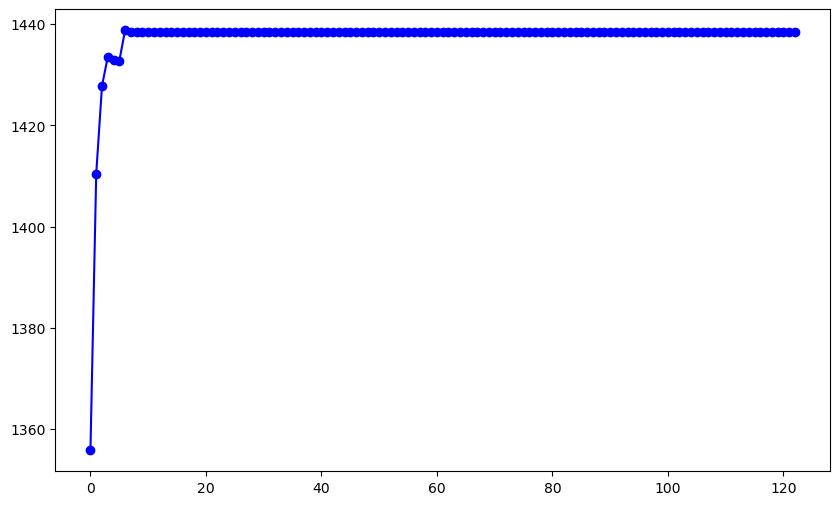

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')